In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
import random
import requests
import datetime
import os
import holidays
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\TPWODL\New folder_Content\TimeSeriesForecasting_End_To_End\data\raw\twitter-complaints_per_day.csv')

In [5]:
df

,DATE,Complaint_Count
0,2022-06-10,10
1,2022-06-11,12
2,2022-06-12,5
3,2022-06-13,15
4,2022-06-14,16
...,...,...
1223,2025-10-16,18
1224,2025-10-17,18
1225,2025-10-18,17
1226,2025-10-19,37


C:\Users\TPWODL\AppData\Local\Temp\ipykernel_15616\2904307652.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Complaint_Count'], shade=True, color='purple')


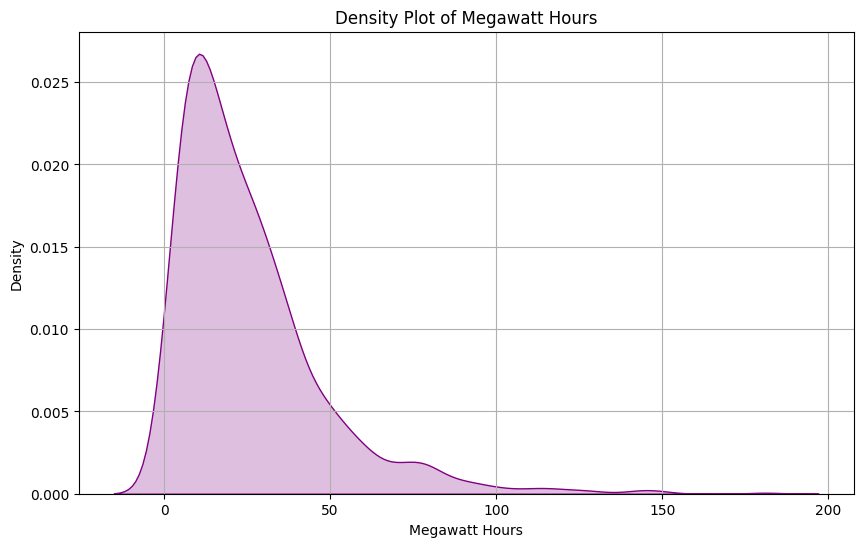

In [7]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Complaint_Count'], shade=True, color='purple')
plt.title('Density Plot of Megawatt Hours')
plt.xlabel('Megawatt Hours')
plt.ylabel('Density')
plt.grid(True)
plt.show()